In [1]:
import cairo
import math, cmath
import networkx as nx # graph tools
import matplotlib.pyplot as plt

%matplotlib inline

## Amann-Beenker A5
TODO: write the documentation

### The substitution rules

The two tiles of the A5 are a square and a lozenge (rhombus). 
Here we shall work with the lozenge and two half squares:
<img src="http://localhost:8888/notebooks/Ammann-Beenker/A5_tiles.png">
where the arrows implement the matching rules, and also serve distinguishing between the two half-squares.

The substitution rules are as follows:
<img src="http://localhost:8888/notebooks/Ammann-Beenker/A5_substitution.png">

We can explicitely compute the new points in terms of the old ones (see the subdivide function below).
The irrational involved here is the silver ratio $\lambda = 1 + \sqrt{2}$. The inflation factor is $\lambda^2$.

In [2]:
sq2 = math.sqrt(2)
lb = sq2 - 1.

def subdivide(shapes):
    result = []
    for color, vertices in shapes:
        if color == 0:
            
            A, B, C, D = vertices
            
            P = A + (B - A)*lb
            Pp = C + (B - C)*lb
            Q = A + (D - A)*lb
            Qp = C + (D - C)*lb
            R = B + (Q + D - 2*B)*lb/sq2
            Rp = B + (Qp + D - 2*B)*lb/sq2
            
            lozUp = (0, (A, P, R, Q))
            lozDown = (0, (Rp, Pp, C, Qp))
            lozMid = (0, (D, R, B, Rp))
            sqUR = (1, (R, D, Q))
            sqUL = (1, (R, B, P))
            sqDL = (1, (Rp, B, Pp))
            sqDR = (1, (Rp, D, Qp))
            
            result += [lozUp, lozDown, lozMid, sqUL, sqUR, sqDL, sqDR]
        else:
            
            A, B, C = vertices
            
            P = B + (A - B)*lb
            Q = B + (C - B)*lb/sq2
            R = C + (B - C)*lb/sq2
            S = A + (C - A)*lb
            T = P + Q - B
            
            sqU = (1, (T, A, P))
            sqDL = (1, (T, R, Q))
            sqDR = (1, (R, C, S))
            lozU = (0, (A, T, R, S))
            lozD = (0, (T, P, B, Q))
            
            result += [lozU, lozD, sqU, sqDL, sqDR]
    return result

In [3]:
def draw(shapes):
    # Draw lozenges
    for color, vertices in shapes:
        if color == 0:
            A, B, C, D = vertices
            cr.move_to(A.real, A.imag)
            cr.line_to(B.real, B.imag)
            cr.line_to(D.real, D.imag)
            cr.move_to(C.real, C.imag)
            cr.line_to(B.real, B.imag)
            cr.line_to(D.real, D.imag)
            cr.close_path()
    cr.set_source_rgb(1.0, 0.35, 0.35)
    cr.fill()    

    # Draw half-squares
    for color, vertices in shapes:
        if color == 1:
            A, B , C = vertices
            cr.move_to(A.real, A.imag)
            cr.line_to(B.real, B.imag)
            cr.line_to(C.real, C.imag)
            cr.close_path()
    cr.set_source_rgb(0.4, 0.4, 1.0)
    cr.fill()

    # Determine line width from size of first triangle
    color, vertices = shapes[0]
    cr.set_line_width(abs(vertices[1] - vertices[0]) / 10.0)
    cr.set_line_join(cairo.LINE_JOIN_ROUND)

    # Draw outlines
    for color, vertices in shapes:
        if color == 0:
            A, B, C, D = vertices
            cr.move_to(A.real, A.imag)
            cr.line_to(B.real, B.imag)
            cr.line_to(C.real, C.imag)
            cr.line_to(D.real, D.imag)
            cr.close_path()
            #cr.line_to(D.real, D.imag)
        else:
            A, B, C = vertices
            cr.move_to(C.real, C.imag)
            cr.line_to(A.real, A.imag)
            cr.line_to(B.real, B.imag)
        
    # set bg color
    cr.set_source_rgb(0.2, 0.2, 0.2)
    # commit to surface
    cr.stroke()

In [4]:
""" take the list of shapes, and return the dictionary 
whose keys are nodes, and whose values are the neighbouring nodes """

def graph(shapes):
    dh = {}
    for color, vertices in shapes:
        # lozenges
        if color == 0:
            for i in range(4):
                v = vertices[i]
                # neighbours of the vertex v
                neigh = {vertices[i-1], vertices[(i+1) % 4]}
                if v in dh:
                    dh[v] |= neigh
                else:
                    dh[v] = neigh
        # half-squares
        else:
            A, B, C = vertices
                
            if A in dh: dh[A] |= {B, C}
            else: dh[A] = {B,C}
                    
            if B in dh: dh[B] |= {A}
            else: dh[B] = {A}
                    
            if C in dh: dh[C] |= {A}
            else: dh[C] = {A}
    
    return dh

## Now some fooling around
Drawing, graphing and other stuff...

In [13]:
IMAGE_SIZE = (1000, 1000)

# Prepare cairo surface
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, IMAGE_SIZE[0], IMAGE_SIZE[1])
cr = cairo.Context(surface)
cr.translate(IMAGE_SIZE[0] / 2.0, IMAGE_SIZE[1] / 2.0) # centering
wheelRadius = (1./math.sqrt(2)) * math.sqrt((IMAGE_SIZE[0] / 2.0) ** 2 + (IMAGE_SIZE[1] / 2.0) ** 2)
cr.scale(wheelRadius, wheelRadius)

# draw a single lozenge
B = 0.
A = cmath.rect(1, -3*math.pi/8)
D = 2*math.cos(3*math.pi/8)
C = cmath.rect(1, 3*math.pi/8)

loz = [(0, (A, B, C, D))]
shapes=subdivide(loz)
shapes=subdivide(shapes)
#shapes=subdivide(shapes)
draw(shapes)

In [14]:
surface.write_to_png("A52.png")

In [60]:
IMAGE_SIZE = (1000, 1000)

# Prepare cairo surface
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, IMAGE_SIZE[0], IMAGE_SIZE[1])
cr = cairo.Context(surface)
cr.translate(IMAGE_SIZE[0] / 2.0, IMAGE_SIZE[1] / 2.0) # centering
wheelRadius = 0.5 * math.sqrt((IMAGE_SIZE[0] / 2.0) ** 2 + (IMAGE_SIZE[1] / 2.0) ** 2)
cr.scale(wheelRadius, wheelRadius)

# draw a single half-square
B = 0.
A = cmath.rect(1, -math.pi/4)
C = 2*math.cos(math.pi/4)

sq = [(1, (A, B, C))]
shapes=subdivide(sq)
shapes=subdivide(shapes)
shapes=subdivide(shapes)
shapes=subdivide(shapes)
draw(shapes)

In [61]:
surface.write_to_png("A52.png")

In [5]:
""" start with a square made of two half-squares """

IMAGE_SIZE = (1000, 1000)

# Prepare cairo surface
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, IMAGE_SIZE[0], IMAGE_SIZE[1])
cr = cairo.Context(surface)
cr.translate(IMAGE_SIZE[0] / 2.0, IMAGE_SIZE[1] / 2.0) # centering
wheelRadius = math.sqrt((IMAGE_SIZE[0] / 2.0) ** 2 + (IMAGE_SIZE[1] / 2.0) ** 2)
cr.scale(wheelRadius, wheelRadius)

# start with a square
square = []
# first half-square
C = cmath.rect(1, -math.pi/4)
A = cmath.rect(1, -3*math.pi/4)
B = cmath.rect(1, -5*math.pi/4)
square.append((1, (A, B, C)))
# second half-square
C = cmath.rect(1, -5*math.pi/4)
B = cmath.rect(1, -math.pi/4)
A = cmath.rect(1, math.pi/4)
square.append((1, (A, C, B)))

it_square = square[:]
for i in range(3):
    it_square = subdivide(it_square)

In [10]:
draw(it_square)
surface.write_to_png("A5_square.png")

In [8]:
dh = graph(it_square)

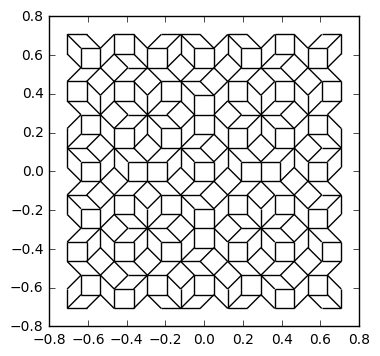

In [9]:
# convert to an networkx graph
g = nx.Graph(dh)

# retrieve the node positions
list_pos = [(v.real, v.imag) for v in dh.keys()]
# keys: nodes, entries: position of the nodes
dict_pos = dict(zip(dh.keys(), list_pos))

# drawing!
nx.draw_networkx_edges(g, dict_pos)
plt.axes().set_aspect('equal')
plt.show()

In [240]:
""" start with a wheel of lozenges, completed with half-squares to make a big square """

IMAGE_SIZE = (1000, 1000)

# Prepare cairo surface
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, IMAGE_SIZE[0], IMAGE_SIZE[1])
cr = cairo.Context(surface)
cr.translate(IMAGE_SIZE[0] / 2.0, IMAGE_SIZE[1] / 2.0) # centering
wheelRadius = lb * math.sqrt((IMAGE_SIZE[0] / 2.0) ** 2 + (IMAGE_SIZE[1] / 2.0) ** 2)
cr.scale(wheelRadius, wheelRadius)

# construct the wheel
wheel = []
A = 0
for i in range(8):
    B = cmath.rect(1, (i) * math.pi / 4)
    D = cmath.rect(1, (i + 1) * math.pi / 4)
    C = B + D
    wheel.append((0, (A, B, C, D)))
    
# half-squares

for i in range(8):
    C = cmath.rect(1, i * math.pi / 4)
    B = (1+sq2) * C
    A = cmath.rect(1, i * math.pi / 4) + cmath.rect(1, (i+1) * math.pi / 4)
    wheel.append((1, (A, B, C)))
    
    A = cmath.rect(1, (i-1) * math.pi / 4) + cmath.rect(1, i * math.pi / 4)
    wheel.append((1, (A, B, C)))

it_wheel = wheel[:]
for i in range(3):
    it_wheel = subdivide(it_wheel)

In [241]:
draw(it_wheel)
surface.write_to_png("A5_wheel1.png")